# Dataset
Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.  
[Download](https://drive.google.com/file/d/1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb/view)

## Langkah 1 - Import Library

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data

### Langkah 2.1. Pra Pengolahan Data Training

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1.  - Inisiasi Model CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Langkah 3.3 - Pembuatan Layer Pooling 1

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 4 - Fit CNN

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


250/250 [==============================] - 117s 460ms/step - loss: 0.6800 - accuracy: 0.5694 - val_loss: 0.6295 - val_accuracy: 0.6545
Epoch 2/25
250/250 [==============================] - 46s 185ms/step - loss: 0.6083 - accuracy: 0.6706 - val_loss: 0.5612 - val_accuracy: 0.7190
Epoch 3/25
250/250 [==============================] - 44s 175ms/step - loss: 0.5537 - accuracy: 0.7106 - val_loss: 0.5324 - val_accuracy: 0.7350
Epoch 4/25
250/250 [==============================] - 66s 265ms/step - loss: 0.5195 - accuracy: 0.7442 - val_loss: 0.5079 - val_accuracy: 0.7575
Epoch 5/25
250/250 [==============================] - 84s 338ms/step - loss: 0.5013 - accuracy: 0.7550 - val_loss: 0.4980 - val_accuracy: 0.7560
Epoch 6/25
250/250 [==============================] - 44s 177ms/step - loss: 0.4792 - accuracy: 0.7691 - val_loss: 0.5052 - val_accuracy: 0.7680
Epoch 7/25
250/250 [==============================] - 43s 171ms/step - loss: 0.4581 - accuracy: 0.7851 - val_loss: 0.4828 - val

## Langkah 5 - Prediksi dengan 1 Citra

In [17]:
import numpy as np
from keras.preprocessing import image
def image_predict(img):
    test_image = image.load_img(img, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    
    return prediction

### Citra Anjing

1/1 [==============================] - 0s 32ms/step


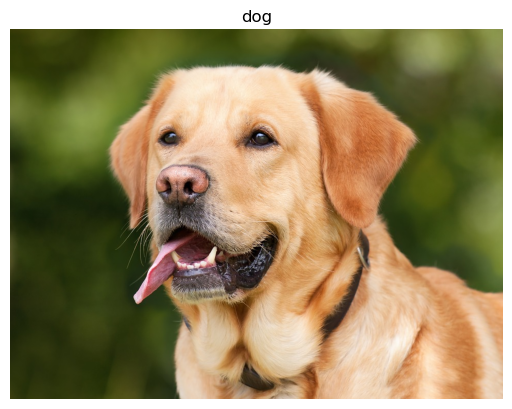

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt

img_1 = 'dataset/single_prediction/cat_or_dog_1.jpg'
img1 = cv.imread(img_1)
prediction = image_predict(img_1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title(prediction)
plt.axis('off') 
plt.show()

### Citra Kucing

1/1 [==============================] - 0s 30ms/step


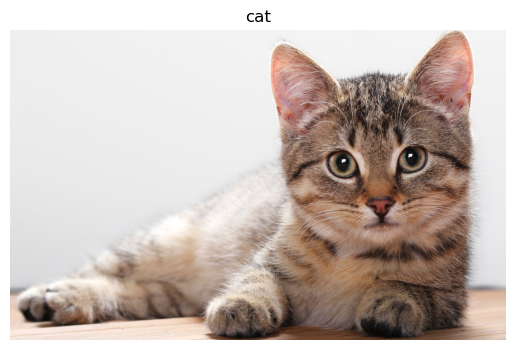

In [26]:
img_2 = 'dataset/single_prediction/cat_or_dog_2.jpg'
img2 = cv.imread(img_2)
prediction = image_predict(img_2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(prediction)
plt.axis('off') 
plt.show()